In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(train_X,train_Y), (test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


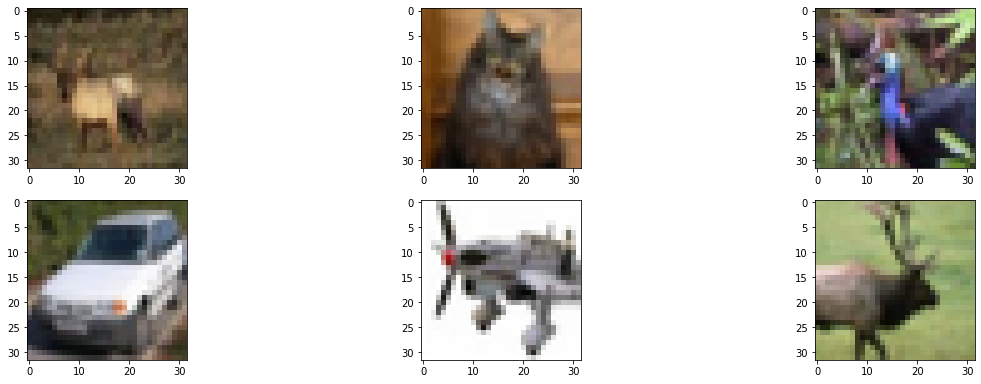

In [3]:
plt.figure(figsize=(20,10))
for i in range(6):
  n=np.random.randint(0,50)
  plt.subplot(330+1+i)
  plt.imshow(train_X[n])

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils

train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
      #tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

     # tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy']
              )

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 3,227,050
Trainable params: 3,227,050
Non-trainable params: 0
______________________________________________

In [6]:
history=model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=30,
    verbose=1)


Epoch 1/10
1667/1667 [==============================] - 180s 108ms/step - loss: 1.3405 - accuracy: 0.5273 - val_loss: 1.0504 - val_accuracy: 0.6295
Epoch 2/10
1667/1667 [==============================] - 180s 108ms/step - loss: 0.9185 - accuracy: 0.6811 - val_loss: 1.1541 - val_accuracy: 0.6222
Epoch 3/10
1667/1667 [==============================] - 180s 108ms/step - loss: 0.7136 - accuracy: 0.7562 - val_loss: 0.9719 - val_accuracy: 0.6875
Epoch 4/10
1667/1667 [==============================] - 179s 107ms/step - loss: 0.5514 - accuracy: 0.8161 - val_loss: 0.9341 - val_accuracy: 0.6990
Epoch 5/10
1667/1667 [==============================] - 174s 104ms/step - loss: 0.4245 - accuracy: 0.8592 - val_loss: 1.1566 - val_accuracy: 0.7105
Epoch 6/10
1667/1667 [==============================] - 173s 104ms/step - loss: 0.3409 - accuracy: 0.8884 - val_loss: 1.2818 - val_accuracy: 0.6912
Epoch 7/10
1667/1667 [==============================] - 182s 109ms/step - loss: 0.2805 - accuracy: 0.9085 - val_

In [7]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 7s 22ms/step - loss: 2.1837 - accuracy: 0.6944
69.44000124931335


In [8]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}


In [18]:
from PIL import Image
import numpy as np
from google.colab import files
# the input image is required to be in the shape of dataset, i.e (32,32,3)

from PIL import Image
import numpy as np
im=Image.open("aeroplane.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0 aeroplane
